In [102]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas_datareader
import datetime
import seaborn
import statsmodels.formula.api as sm
import os
os.listdir('./Data/')

['GDPDATA.xlsx', 'EducationDATA.xlsx']

In [103]:
GDP = 'data/GDPDATA.xlsx'
EDU = 'data/EducationDATA.xlsx'

# Data cleaning - EDU

In [104]:
pd.read_excel(EDU).head(10)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Last Updated Date,2019-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2009.00000,2010.00000,2011.00000,2012.00000,2013.00000,2014.00000,2015.00000,2016.00000,2017.00000,2018.0
3,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.92479,6.92927,6.11913,6.54906,6.80806,6.16293,6.47906,NaN,NaN,NaN
4,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.46196,3.43785,2.52441,3.43437,3.67390,3.24202,4.20525,3.92675,NaN
5,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.47411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.95464,2.18972,NaN
7,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19556,NaN
8,Arab World,ARB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Arab Emirates,ARE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Skipping unnecessary rows
edu = pd.read_excel(EDU, skiprows=3)
edu.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.92479,6.92927,6.11913,6.54906,6.80806,6.16293,6.47906,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.46196,3.43785,2.52441,3.43437,3.67390,3.24202,4.20525,3.92675,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.47411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.95464,2.18972,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19556,NaN
5,Arab World,ARB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.53105,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.57218,NaN,NaN
8,Armenia,ARM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.84079,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,NaN,NaN
9,American Samoa,ASM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# Dropping cells with redundant data
drop_these = ['Country Name', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998']
edu.drop(drop_these, axis=1, inplace=True)
edu.head(5)


,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,4.39554,4.71468,4.73948,4.92428,NaN,4.40891,4.68076,NaN,4.81504,...,5.92479,6.92927,6.11913,6.54906,6.80806,6.16293,6.47906,NaN,NaN,NaN
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.46196,3.43785,2.52441,3.43437,3.67390,3.24202,4.20525,3.92675,NaN
2,AGO,NaN,2.60753,NaN,NaN,NaN,NaN,2.77620,2.85969,NaN,...,NaN,3.47411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,3.37971,3.28692,3.34060,3.05664,3.06427,3.17008,3.23872,3.15719,3.26868,...,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797,3.95464,2.18972,NaN
4,AND,NaN,NaN,NaN,1.68153,NaN,1.52269,1.59653,2.18989,2.07097,...,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368,3.25670,3.19556,NaN


In [107]:
and_these = ['2018', '2017', '2016'] #Not all countries have released data for these years yet
edu.drop(and_these, axis=1, inplace=True)
edu.head(5)

,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ABW,4.39554,4.71468,4.73948,4.92428,NaN,4.40891,4.68076,NaN,4.81504,4.99923,5.92479,6.92927,6.11913,6.54906,6.80806,6.16293,6.47906
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.46196,3.43785,2.52441,3.43437,3.67390,3.24202
2,AGO,NaN,2.60753,NaN,NaN,NaN,NaN,2.77620,2.85969,NaN,NaN,NaN,3.47411,NaN,NaN,NaN,NaN,NaN
3,ALB,3.37971,3.28692,3.34060,3.05664,3.06427,3.17008,3.23872,3.15719,3.26868,NaN,NaN,NaN,NaN,NaN,3.53930,NaN,3.43797
4,AND,NaN,NaN,NaN,1.68153,NaN,1.52269,1.59653,2.18989,2.07097,2.93007,3.15484,3.05742,3.14508,NaN,2.43807,2.99781,3.25368


In [108]:
edu.count() #To see how many columns there are 

Country Code    264
1999            155
2000            160
2001            153
2002            161
2003            138
2004            163
2005            145
2006            142
2007            138
2008            164
2009            157
2010            167
2011            162
2012            155
2013            162
2014            155
2015            138
dtype: int64

In [109]:
# Dropping NaN'
edu = edu.dropna(thresh=18)
edu.head(5)

,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
7,ARG,4.521680,4.58031,4.83374,4.01734,3.53505,3.48652,3.86001,4.12821,4.46260,4.844410,5.53105,5.01971,5.29063,5.345830,5.43661,5.36144,5.77611
8,ARM,2.235190,2.77273,2.46944,2.13504,2.14504,2.48673,2.71203,2.71577,3.01894,3.172730,3.84079,3.24900,3.14385,2.772480,2.65018,2.24724,2.80591
12,AUT,6.112340,5.58881,5.57548,5.52213,5.36183,5.30243,5.24937,5.22652,5.14690,5.263960,5.73025,5.70048,5.59227,5.480400,5.54711,5.44898,5.45304
13,AZE,4.212170,3.85399,3.50342,3.15449,3.28615,3.44766,2.97462,2.55552,2.54928,2.440930,3.22431,2.78062,2.43564,2.067630,2.44213,2.63304,2.95168
34,CEB,4.579165,4.85891,5.08048,5.17097,5.06729,4.85505,4.84486,4.76605,4.59055,4.906235,4.96436,4.76895,4.60079,4.481895,4.58772,4.63195,4.81454


In [110]:
# Subsetting
edu = edu.set_index('Country Code')
edu.head(5)

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Code,,,,,,,,,,,,,,,,,
ARG,4.521680,4.58031,4.83374,4.01734,3.53505,3.48652,3.86001,4.12821,4.46260,4.844410,5.53105,5.01971,5.29063,5.345830,5.43661,5.36144,5.77611
ARM,2.235190,2.77273,2.46944,2.13504,2.14504,2.48673,2.71203,2.71577,3.01894,3.172730,3.84079,3.24900,3.14385,2.772480,2.65018,2.24724,2.80591
AUT,6.112340,5.58881,5.57548,5.52213,5.36183,5.30243,5.24937,5.22652,5.14690,5.263960,5.73025,5.70048,5.59227,5.480400,5.54711,5.44898,5.45304
AZE,4.212170,3.85399,3.50342,3.15449,3.28615,3.44766,2.97462,2.55552,2.54928,2.440930,3.22431,2.78062,2.43564,2.067630,2.44213,2.63304,2.95168
CEB,4.579165,4.85891,5.08048,5.17097,5.06729,4.85505,4.84486,4.76605,4.59055,4.906235,4.96436,4.76895,4.60079,4.481895,4.58772,4.63195,4.81454


In [111]:
myDict = {}
for i in range(1999, 2016): # Our range is from 1999 to and including 2015 
    myDict[str(i)] = f'e{i}' 
myDict

{'1999': 'e1999',
 '2000': 'e2000',
 '2001': 'e2001',
 '2002': 'e2002',
 '2003': 'e2003',
 '2004': 'e2004',
 '2005': 'e2005',
 '2006': 'e2006',
 '2007': 'e2007',
 '2008': 'e2008',
 '2009': 'e2009',
 '2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015'}

In [112]:
# Renaming years to avoid any hiccups
edu.rename(columns = myDict, inplace=True)
edu.head(10)

,e1999,e2000,e2001,e2002,e2003,e2004,e2005,e2006,e2007,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015
Country Code,,,,,,,,,,,,,,,,,
ARG,4.521680,4.58031,4.83374,4.01734,3.53505,3.486520,3.86001,4.12821,4.46260,4.844410,5.531050,5.01971,5.29063,5.345830,5.43661,5.361440,5.77611
ARM,2.235190,2.77273,2.46944,2.13504,2.14504,2.486730,2.71203,2.71577,3.01894,3.172730,3.840790,3.24900,3.14385,2.772480,2.65018,2.247240,2.80591
AUT,6.112340,5.58881,5.57548,5.52213,5.36183,5.302430,5.24937,5.22652,5.14690,5.263960,5.730250,5.70048,5.59227,5.480400,5.54711,5.448980,5.45304
AZE,4.212170,3.85399,3.50342,3.15449,3.28615,3.447660,2.97462,2.55552,2.54928,2.440930,3.224310,2.78062,2.43564,2.067630,2.44213,2.633040,2.95168
CEB,4.579165,4.85891,5.08048,5.17097,5.06729,4.855050,4.84486,4.76605,4.59055,4.906235,4.964360,4.76895,4.60079,4.481895,4.58772,4.631950,4.81454
CHE,4.890230,4.78140,4.95981,5.31429,5.52376,5.445730,5.20410,4.96158,4.68738,4.867990,5.041180,4.92605,4.96986,5.033370,5.04048,5.051230,5.10465
CIV,4.094330,3.70367,3.66868,4.09033,3.96799,4.127860,4.10575,4.00150,4.25833,4.341260,4.412460,4.55346,4.13755,4.611080,4.72900,4.577430,4.82988
COL,4.440800,3.51121,3.70868,4.26813,4.32514,4.079350,3.99501,3.89332,4.05870,3.909800,4.747430,4.82616,4.45981,4.385310,4.90324,4.665160,4.50048
CZE,3.684810,3.65089,3.74855,3.97256,4.13643,4.014240,3.89038,4.21710,3.86663,3.744550,4.171280,4.06446,4.27214,4.250860,4.09089,3.994620,5.78885


In [113]:
edu = edu.reset_index()

In [114]:
# Switching data from wide to long
edu = pd.wide_to_long(edu, stubnames='e', i='Country Code', j='Year')
edu.head(5)


,,e
Country Code,Year,
ARG,1999,4.521680
ARM,1999,2.235190
AUT,1999,6.112340
AZE,1999,4.212170
CEB,1999,4.579165


In [115]:
edu = edu.reset_index()
edu.rename(columns = {'e':'edu'}, inplace = True)
edu.rename(columns = {'Country Code':'Country_Code'}, inplace = True)
edu.head(5)

,Country_Code,Year,edu
0,ARG,1999,4.521680
1,ARM,1999,2.235190
2,AUT,1999,6.112340
3,AZE,1999,4.212170
4,CEB,1999,4.579165


# Plotting data - EDU

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


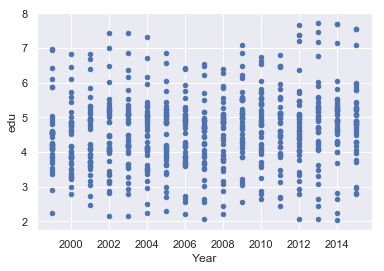

In [116]:
edu.plot.scatter(x = 'Year',y = 'edu')

In [117]:
import ipywidgets as widgets
def plot_edu(dataframe, Country_Code): 
    l = dataframe['Country_Code'] == Country_Code
    
    ax=dataframe.loc[l,:].plot(x='Year', y='edu', style='-o', legend='False')

In [118]:
widgets.interact(plot_edu,
    dataframe = widgets.fixed(edu),
    Country_Code = widgets.Dropdown(description='Countries', options=edu.Country_Code.unique(), value='MEX')
); 


interactive(children=(Dropdown(description='Countries', index=24, options=('ARG', 'ARM', 'AUT', 'AZE', 'CEB', …

# Data cleaning - GDP

In [119]:
gdp = pd.read_excel(GDP, skiprows = 3) # Cleaning rows

In [120]:
# Cleaning columns
Drop_these = ['Indicator Code','Country Name','Indicator Name','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998','2016','2017','2018']
gdp.drop(Drop_these, axis = 1, inplace = True) # Axis 1 = columns

In [121]:
# Drop all rows with NaN values
gdp = gdp.dropna()

In [122]:
# Indexing data by Country Code
gdp = gdp.set_index('Country Code')

In [123]:
MyDict1 = {}
for i in range(1999, 2016): 
    MyDict1[str(i)] = f'e{i}'
MyDict1

{'1999': 'e1999',
 '2000': 'e2000',
 '2001': 'e2001',
 '2002': 'e2002',
 '2003': 'e2003',
 '2004': 'e2004',
 '2005': 'e2005',
 '2006': 'e2006',
 '2007': 'e2007',
 '2008': 'e2008',
 '2009': 'e2009',
 '2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015'}

In [124]:
# Renaming years to avoid any hiccups
gdp.rename(columns = MyDict1, inplace = True)

In [125]:
gdp = gdp.reset_index()

In [126]:
# Switching data from wide to long
gdp = pd.wide_to_long(gdp, stubnames='e', i='Country Code', j='Year')
gdp.head(5)

,,e
Country Code,Year,
ABW,1999,1.238039
AGO,1999,2.181490
ALB,1999,12.890000
AND,1999,4.099081
ARB,1999,1.851039


In [127]:
gdp = gdp.reset_index()
gdp.rename(columns = {'e':'gdp'}, inplace = True)
gdp.rename(columns = {'Country Code':'Country_Code'}, inplace = True)
gdp.head(5)

,Country_Code,Year,gdp
0,ABW,1999,1.238039
1,AGO,1999,2.181490
2,ALB,1999,12.890000
3,AND,1999,4.099081
4,ARB,1999,1.851039


# Plotting data - GDP

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


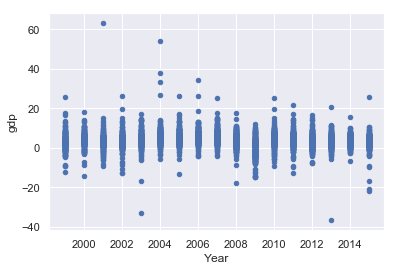

In [158]:
gdp.plot.scatter(x = 'Year', y = 'gdp')

In [129]:
import ipywidgets as widgets
def plot_gdp(dataframe, Country_Code): 
    I = dataframe['Country_Code'] == Country_Code
    
    ax=dataframe.loc[I,:].plot(x='Year', y='gdp', style='-o', legend='False')

In [130]:
widgets.interact(plot_gdp,
    dataframe = widgets.fixed(gdp),
    Country_Code = widgets.Dropdown(description='Countries', options=gdp.Country_Code.unique(), value='MEX')
); 


interactive(children=(Dropdown(description='Countries', index=137, options=('ABW', 'AGO', 'ALB', 'AND', 'ARB',…

# Merging data and graphic illustrations

In [131]:
merged_data = pd.merge(edu,gdp, on=['Country_Code','Year'], how='inner')
merged_data.head(5)

,Country_Code,Year,edu,gdp
0,ARG,1999,4.521680,-3.385457
1,ARM,1999,2.235190,3.300000
2,AUT,1999,6.112340,3.556330
3,AZE,1999,4.212170,7.400001
4,CEB,1999,4.579165,1.964604


In [132]:
merged_data.count()

Country_Code    697
Year            697
edu             697
gdp             697
dtype: int64

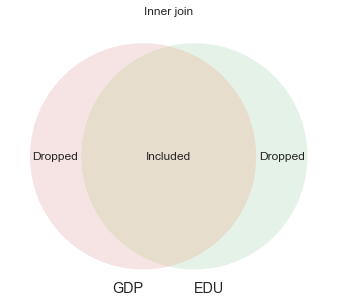

In [133]:
plt.figure(figsize=(10,5))
v = venn2(subsets = (4, 4, 10), set_labels = ('GDP', 'EDU'))
v.get_label_by_id('100').set_text('Dropped'); v.get_patch_by_id('100').set_alpha(0.15)
v.get_label_by_id('010').set_text('Dropped'); v.get_patch_by_id('010').set_alpha(0.15)
v.get_label_by_id('110').set_text('Included')
plt.title('Inner join')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


,Country_Code,Year,edu,gdp
0,ARG,1999,4.521680,-3.385457
1,ARM,1999,2.235190,3.300000
2,AUT,1999,6.112340,3.556330
3,AZE,1999,4.212170,7.400001
4,CEB,1999,4.579165,1.964604


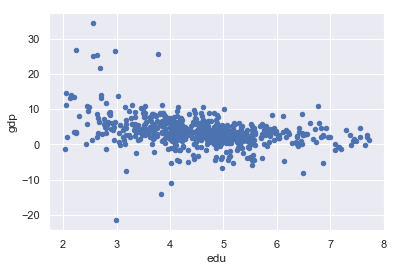

In [165]:
merged_data.plot.scatter(y='gdp', x='edu')
merged_data.head(5)

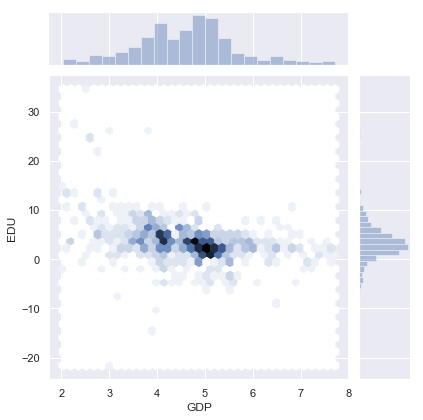

In [135]:
import seaborn as sns
sns.set()
h = sns.jointplot(x=merged_data.edu, y=merged_data.gdp, kind='hex')
h.set_axis_labels('GDP', 'EDU');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


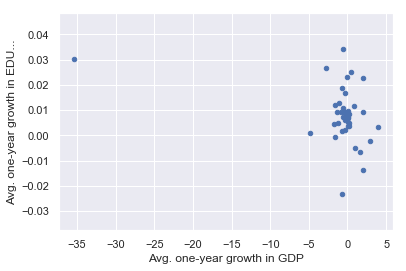

In [159]:
ax = merged_data.groupby('Country_Code').agg(lambda x : x.pct_change().mean()).plot(kind='scatter',x='gdp',y='edu')
ax.set_xlabel('Avg. one-year growth in GDP');
ax.set_ylabel('Avg. one-year growth in EDU...');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


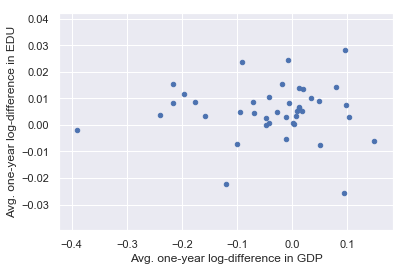

In [160]:
ax = merged_data.groupby('Country_Code').agg(lambda x: (np.log(x)).diff().mean()).plot(kind='scatter',x='gdp',y='edu')
ax.set_xlabel('Avg. one-year log-difference in GDP');
ax.set_ylabel('Avg. one-year log-difference in EDU');

In [138]:
np.seterr(divide='ignore', invalid='ignore')
logdiffs = merged_data.set_index('Country_Code').groupby(level=0).transform(lambda x : (np.log(x)).diff(1) ).reset_index()

In [139]:
res0 = sm.ols(formula='edu~gdp',                    data=merged_data).fit()
res1 = sm.ols(formula='edu~gdp+C(Year)',            data=merged_data).fit()
res2 = sm.ols(formula='edu~gdp+C(Year)+C(Country_Code)', data=merged_data).fit()
res3 = sm.ols(formula='edu~gdp',                                    data=merged_data).fit() # in this dataframe, variables are already logged
res4 = sm.ols(formula='edu~gdp+C(Country_Code)',                         data=merged_data).fit() # in this dataframe, variables are already logged

print(f'Baseline:        {res0.params["gdp"] : 8.4f}')
print(f'Year FE:         {res1.params["gdp"] : 8.4f}')
print(f'Year+Country FE: {res2.params["gdp"] : 8.4f}')
print(f'FD:              {res3.params["gdp"]         : 8.4f}')
print(f'FD + country FE: {res4.params["gdp"]         : 8.4f}')

Baseline:         -0.0922
Year FE:          -0.0997
Year+Country FE:  -0.0086
FD:               -0.0922
FD + country FE:  -0.0210


In [140]:
res = pd.DataFrame(data = [
        ['Baseline',         res0.params["gdp"], res1.bse["gdp"]], 
        ['Year FE',        res1.params["gdp"], res1.bse["gdp"]], 
        ['Year+country FE', res2.params["gdp"], res2.bse["gdp"]], 
        ['FD',              res3.params["gdp"],         res3.bse["gdp"]],
        ['FD+country FE',   res4.params["gdp"],         res4.bse["gdp"]],
    ], columns=['Model','estimate','se'])

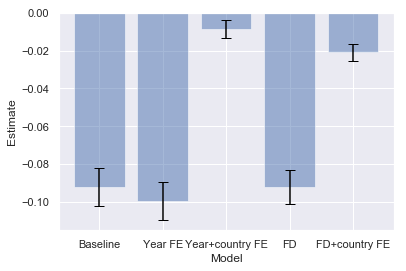

In [141]:
fig, ax = plt.subplots()
x_pos = range(res.shape[0])
ax.bar(x_pos, res.estimate, yerr=res.se,  alpha=0.5, ecolor='black', capsize=5);
ax.set_xticks(x_pos);
ax.set_xticklabels(res.Model);
ax.set_ylabel('Estimate');
ax.set_xlabel('Model');